In [16]:
import nengo
import numpy as np
import matplotlib.pyplot as plt


In [17]:
t_on = 0.5     
u = 1.0         
T = 5          
seed = 1
input_high = 10.0
n_neurons = 300

In [18]:
with nengo.Network(seed=seed) as model:
    steady_stimulus = nengo.Node(lambda t: 0.0 if t < 0.5 else (5.0 if t < 3 else 3.0))
    unsteady_stimulus = nengo.Node(nengo.processes.WhiteSignal(period=T, high=input_high, rms=0.25, seed=seed))

    nonadapt = nengo.Ensemble(
        n_neurons=n_neurons, 
        dimensions=1,
        neuron_type=nengo.LIF(tau_rc=0.02, tau_ref=0.002),
        max_rates=nengo.dists.Uniform(30, 60),
        intercepts=nengo.dists.Uniform(-0.7, 0.7),
    )

    adapt = nengo.Ensemble(
        n_neurons=n_neurons, 
        dimensions=1,
        neuron_type=nengo.AdaptiveLIF(
            tau_rc=0.02, tau_ref=0.002,
            tau_n=0.2,   
            inc_n=0.1    
        ),
        max_rates=nengo.dists.Uniform(30, 60),
        intercepts=nengo.dists.Uniform(-0.7, 0.7),
    )

    nengo.Connection(unsteady_stimulus, nonadapt, synapse=None)
    nengo.Connection(unsteady_stimulus, adapt, synapse=None)

    p_u = nengo.Probe(unsteady_stimulus, synapse=None)
    p_non = nengo.Probe(nonadapt.neurons, synapse=None)
    p_adp = nengo.Probe(adapt.neurons, synapse=None)

with nengo.Simulator(model) as sim:
    sim.run(T)

t = sim.trange()

# fig, axs = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
# axs[0].plot(t, sim.data[p_non], lw=2)
# axs[0].set_title("Non-Adapting Neuron (LIF)")
# axs[0].set_ylabel("Firing rate (Hz)")
# axs[0].grid(True, alpha=0.3)

# axs[1].plot(t, sim.data[p_adp], lw=2)
# axs[1].set_title("Adapting Neuron (AdaptiveLIF)")
# axs[1].set_xlabel("Time (s)")
# axs[1].set_ylabel("Firing rate (Hz)")
# axs[1].grid(True, alpha=0.3)

# ax2 = axs[1].twinx()
# ax2.plot(t, sim.data[p_u], alpha=0.4, linestyle="--")
# ax2.set_ylabel("Input", rotation=270, labelpad=15)

# plt.tight_layout()
# plt.show()


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

### Stimulus Plot

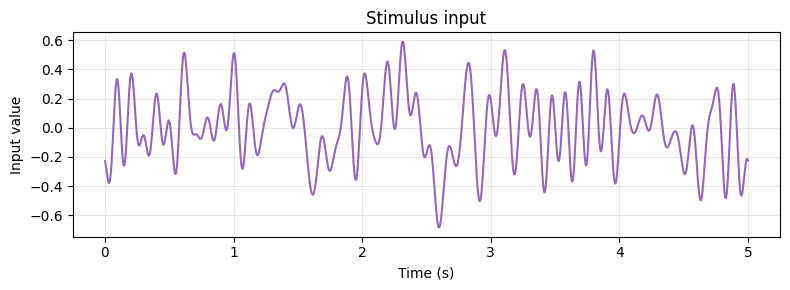

In [19]:
plt.figure(figsize=(8,3))
plt.plot(t, sim.data[p_u], color='tab:purple', linewidth=1.5)
plt.title('Stimulus input')
plt.xlabel('Time (s)')
plt.ylabel('Input value')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
non = sim.data[p_non].ravel()
adp = sim.data[p_adp].ravel()

spikes_non = non.sum() * sim.dt
spikes_adp = adp.sum() * sim.dt

pct_change = (spikes_adp - spikes_non) / spikes_non * 100.0

print("---------Approximate Spike Counts---------")
print(f"Non-adapting (LIF):        {spikes_non} spikes")
print(f"Adapting (AdaptiveLIF):    {spikes_adp} spikes")
print(f"Difference (adapting - non):   {spikes_adp - spikes_non} spikes")
print(f"Percent change:                {pct_change:.2f}%")

---------Approximate Spike Counts---------
Non-adapting (LIF):        16886.0 spikes
Adapting (AdaptiveLIF):    3466.0 spikes
Difference (adapting - non):   -13420.0 spikes
Percent change:                -79.47%
